<a href="https://colab.research.google.com/github/iGEM-UTokyo/2021yeastband/blob/main/HAPmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

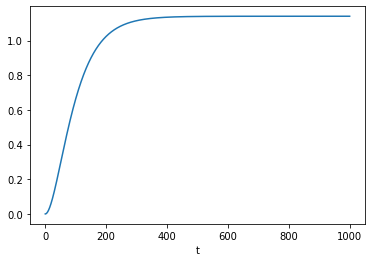

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#HAPの活性化状態
#v0[v[0],v[1],v[2],v[3],v[4]]は順にHb,HbO,HAP,HAP・HbO,HAP・2HbOの濃度
#酸素は外界から常に一定量が供給される
def Hap(v, t, O, k1, k2, k3, k4, k5, k6):
  v0 = -k1*v[0]*O + k2*v[1]
  v1 = k1*v[0]*O - k2*v[1] - k3*v[2]*v[1] + k4*v[3] - k5*v[3]*v[1] + k6*v[4]
  v2 = -k3*v[2]*v[1] + k4*v[3]
  v3 = k3*v[2]*v[1] - k4*v[3] - k5*v[3]*v[1] + k6*v[4]
  v4 = k5*v[3]*v[1] - k6*v[4]
  return [v0,v1,v2,v3,v4]

#速度定数
k1=3
k2=2
k3=5
k4=3
k5=4
k6=10

O=0.0001  #酸素濃度（一定）
v0=[1000.0,0.0,100.0,0.0,0.0] #初期ヘモグロビン濃度とHAP濃度を設定
t=np.arange(0,1000,0.01)

v=odeint(Hap,v0,t,args=(O,k1,k2,k3,k4,k5,k6))

plt.plot(t,v[:,4])  #HAP,HAP・HbO,HAP・2HbOの濃度を描画
plt.xlabel("t")
plt.show()

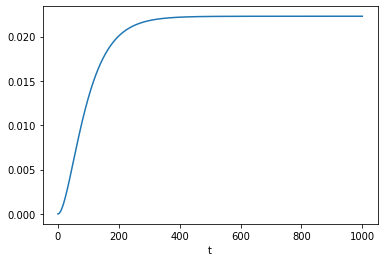

In [ ]:
#Aerobic geneの転写速度
K=50.0
transcript = [x/(x+K) for x in v[:,4]]
plt.plot(t,transcript)
plt.xlabel("t")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


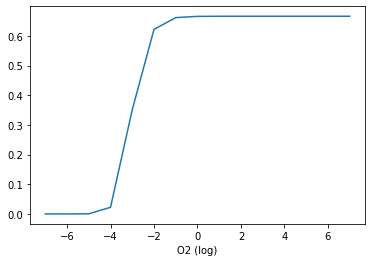

In [ ]:
#酸素濃度に応じた転写量
ans=[]
Os=[-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7]
for x in Os:
  O=10**x
  v=odeint(Hap,v0,t,args=(O,k1,k2,k3,k4,k5,k6))
  ans.append(v[-1,4]/(v[-1,4]+K))
plt.plot(Os,ans)  #横軸は常用対数
plt.xlabel("O2 (log)")
plt.show()